In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [134]:
from importlib import reload
import functions as fun

reload(fun)

<module 'functions' from '/Users/leighannahooper/Desktop/flatiron/project/dsc-mod-1-project-v2-1-onl01-dtsc-ft-041320/functions.py'>

In [135]:
%store -r df_cleaning
%store -r dftop 
%store -r df
%store -r dfgen_bud

In [136]:
df_genres = pd.read_csv("genreIds")

In [137]:
# df_genres

In [138]:
dfgen_bud.head()

,Popularity,vote_average,vote_count,genre_list,genres,genre_2
12,1.274,5.5,3,"[878, 10402, 35]",878,10402
20,1.230,10.0,1,"[10751, 18]",10751,18
46,6.325,5.9,23,"[28, 35, 10749]",28,35
56,0.667,7.0,1,[16],16,NaN
57,1.144,5.3,8,"[28, 80, 53]",28,80


In [139]:
# dftop.head()

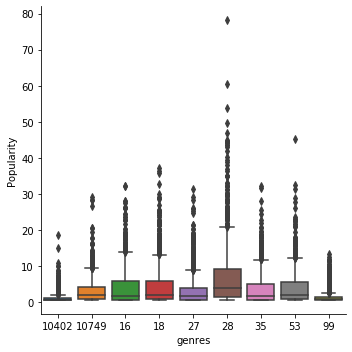

In [142]:
sns.catplot(x="genres", y="Popularity", kind="box", data=dftop)
ax.legend(loc='upper left', ncol=1, scatterpoints=1, frameon=False, labelspacing=1, title='Genre Legend', fancybox=True, framealpha=1, shadow=True, borderpad=1, 
                   labels=['10402 = Music', '10749 = Romance', '16 = Animation', '18 = Drama', '27 = Horror', '28 = Action', '35 = Comedy', '53 = Thriller', '99 = Documentary'])

In [125]:
# fig, ax = plt.subplots(figsize = (12,12))
# sns.violinplot(x="genre_1", y="popularity", data=dftop, ax=ax)
# # get handles and labels from the data so you can edit them
# h,l = ax.get_legend_handles_labels()

# # keep same handles, edit labels with names of choice
# ax.legend(fancybox=True, framealpha=1,  shadow=True,  borderpad=1,
#           labels=['10402 = Music', '10749 = Romance', '16 = Animation', '18 = Drama', '27 = Horror', '28 = Action', '35 = Comedy', '53 = Thriller', '99 = Documentary'])
# fig
# plt.close(2)

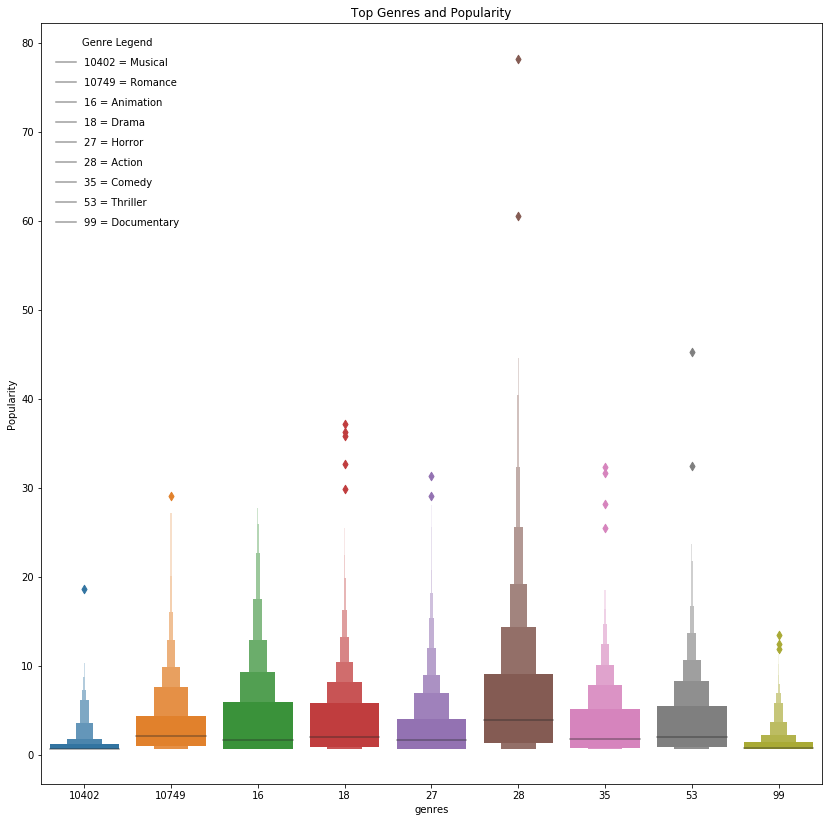

In [164]:
fig, ax = plt.subplots(figsize = (14,14))
ax.set_title('Top Genres and Popularity')
sns.catplot(x='genres', y = 'Popularity', kind = 'boxen', data = dftop, ax=ax)

# get handles and labels from the data so you can edit them
h,l = ax.get_legend_handles_labels()



# keep same handles, edit labels with names of choice
ax.legend(loc='upper left', ncol=1, scatterpoints=1, frameon=False, labelspacing=1, title='Genre Legend', fancybox=True, framealpha=1, shadow=True, borderpad=1, 
                   labels=['10402 = Musical', '10749 = Romance', '16 = Animation', '18 = Drama', '27 = Horror', '28 = Action', '35 = Comedy', '53 = Thriller', '99 = Documentary'])

fig
plt.close(2)



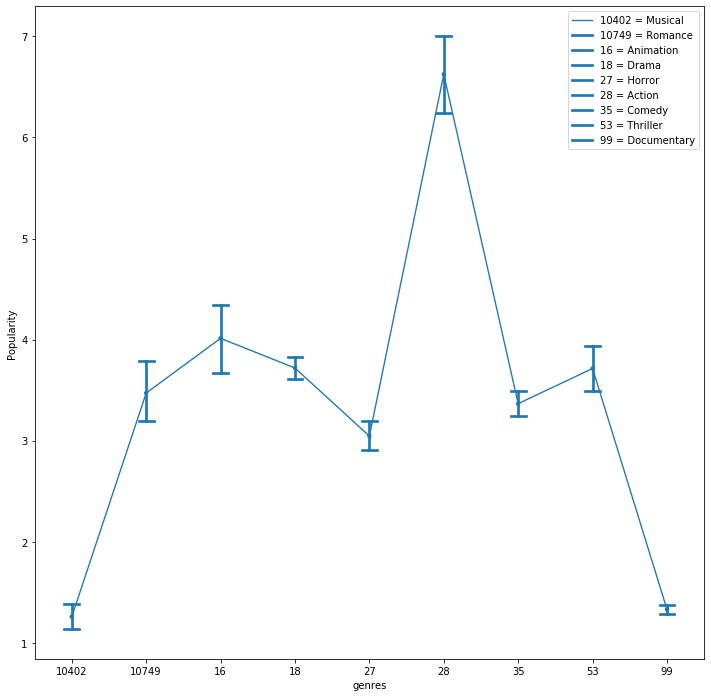

In [149]:
# modified the "x" and "data" parameters
# added the "hue" parameter and removed the "color" parameter
fig, ax = plt.subplots(figsize = (12,12))
ax = sns.pointplot(x='genres',
                y="Popularity",
                data=dftop,
                scale=0.5, dodge=True,
                capsize=.2)

# get handles and labels from the data so you can edit them
h,l = ax.get_legend_handles_labels()

# keep same handles, edit labels with names of choice
ax.legend(labels=['10402 = Musical', '10749 = Romance', '16 = Animation', '18 = Drama', '27 = Horror', '28 = Action', '35 = Comedy', '53 = Thriller', '99 = Documentary'])

plt.show()

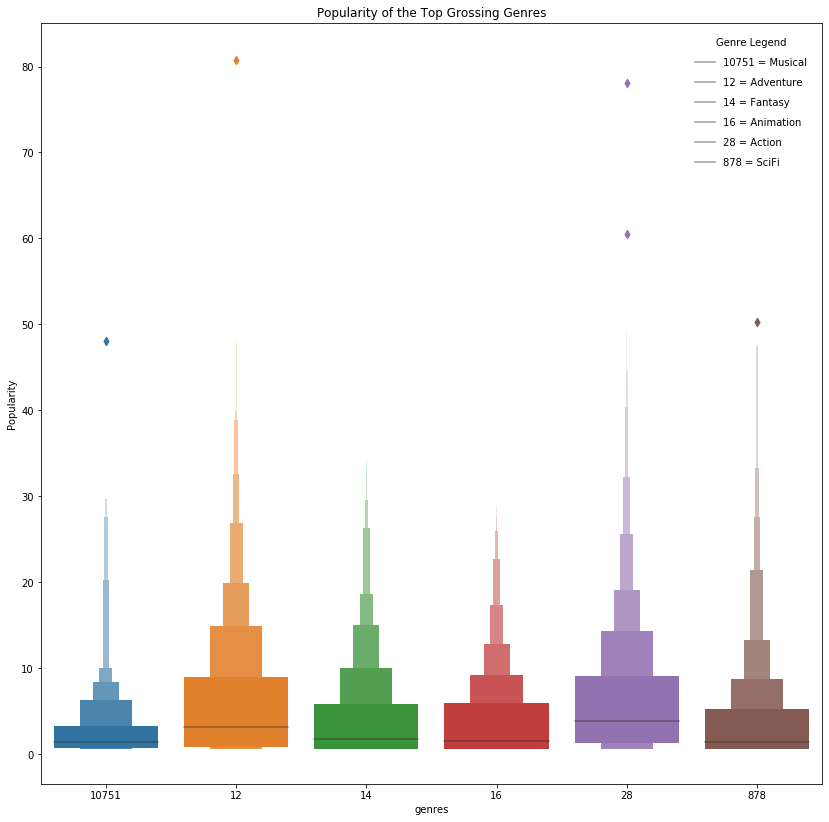

In [163]:
fig, ax = plt.subplots(figsize = (14,14))
ax.set_title('Popularity of the Top Grossing Genres')
sns.catplot(x='genres', y = 'Popularity', kind = 'boxen', data = dfgen_bud, ax=ax)

# get handles and labels from the data so you can edit them
h,l = ax.get_legend_handles_labels()



# keep same handles, edit labels with names of choice
ax.legend(loc='best', scatterpoints=1, ncol=1, frameon=False, labelspacing=1, title='Genre Legend', fancybox=True, framealpha=1, shadow=True, borderpad=1, 
                   labels=['10751 = Musical', '12 = Adventure', '14 = Fantasy', '16 = Animation',  '28 = Action', '878 = SciFi'])

fig
plt.close(2)





#    
